#### <font color="blue"> Written by Rishi Raj Dutta </font>

### Importing all the libraries required

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import datetime 
color = sns.color_palette()
%matplotlib inline
rcParams['figure.figsize'] = 10, 10
# This will give us a good resolution for our visualization
%config InlineBackend.figure_format = 'retina' 

### Loading the data of forex rates of countires listed below with respect to US dollars: 
###### India = DEXINUS
###### China = DEXCHUS
###### Mexico = DEXMXUS
###### Brazil = DEXBZUS
###### Europe = DEXUSEU
###### United Kingdom = DEXUSUK
###### Australia = DEXUSAL
###### Switzerland = DEXSZUS

In [2]:
# Importing the dataset
fd = pd.read_excel('C:\\Users\\rishi\\Desktop\\Fall 2018\\ML in Finance\\IND_CHN_600.xlsx')

### Displaying the data set

In [3]:
fd

,observation_date,DEXINUS,DEXCHUS,DEXMXUS,DEXBZUS,DEXUSEU,DEXUSUK,DEXUSAL,DEXSZUS
0,2016-05-20,67.42,6.5485,18.3770,3.5386,1.1207,1.4513,0.7215,0.9920
1,2016-05-23,67.47,6.5533,18.4710,3.5753,1.1192,1.4444,0.7203,0.9919
2,2016-05-24,67.59,6.5552,18.4435,3.5518,1.1145,1.4623,0.7184,0.9930
3,2016-05-25,67.28,6.5538,18.4500,3.6072,1.1154,1.4694,0.7186,0.9908
4,2016-05-26,66.90,6.5540,18.4500,3.5775,1.1184,1.4673,0.7227,0.9898
5,2016-05-27,66.96,6.5615,18.4280,3.6122,1.1140,1.4644,0.7205,0.9916
6,2016-05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2016-05-31,67.12,6.5798,18.4130,3.6074,1.1135,1.4530,0.7242,0.9934
8,2016-06-01,67.44,6.5748,18.5475,3.6030,1.1165,1.4395,0.7242,0.9892
9,2016-06-02,67.22,6.5815,18.6320,3.5978,1.1157,1.4419,0.7225,0.9902


### Checking for Null Values 

In [4]:
fd.isnull().sum()

observation_date     0
DEXINUS             24
DEXCHUS             24
DEXMXUS             24
DEXBZUS             24
DEXUSEU             24
DEXUSUK             24
DEXUSAL             24
DEXSZUS             24
dtype: int64

In [5]:
fd.shape

(601, 9)

### <font color="Red"> Dropping all the Null Values </font>
### <font color="green"> Reason - All the null values are the recording on the days on which the forex/stock market was closed </font>
### <font color="green"> such as holidays, weekends and events. </font>

In [6]:
fd.dropna(inplace = True)

### Checking for any remaining null values and verifying a uniform dataset 

In [7]:
fd.isnull().sum()

observation_date    0
DEXINUS             0
DEXCHUS             0
DEXMXUS             0
DEXBZUS             0
DEXUSEU             0
DEXUSUK             0
DEXUSAL             0
DEXSZUS             0
dtype: int64

### Slicing the independent (X) and dependant variables (Y) and transforming them into a matrix

In [8]:
Y = fd.iloc[:, 6]
Y = pd.DataFrame(Y)
Y = np.matrix(Y)
X = fd.iloc[:, [5,7,8]]
X = pd.DataFrame(X)
X = np.matrix(X)

###        Y = United Kingdom            and               X = Europe, Australia and Switzerland

In [9]:
Y

matrix([[ 1.4513],
        [ 1.4444],
        [ 1.4623],
        [ 1.4694],
        [ 1.4673],
        [ 1.4644],
        [ 1.453 ],
        [ 1.4395],
        [ 1.4419],
        [ 1.4521],
        [ 1.445 ],
        [ 1.4564],
        [ 1.4546],
        [ 1.4467],
        [ 1.4342],
        [ 1.4223],
        [ 1.413 ],
        [ 1.4185],
        [ 1.4075],
        [ 1.4285],
        [ 1.4688],
        [ 1.4668],
        [ 1.4682],
        [ 1.48  ],
        [ 1.3639],
        [ 1.3217],
        [ 1.3294],
        [ 1.351 ],
        [ 1.3242],
        [ 1.3281],
        [ 1.3021],
        [ 1.2921],
        [ 1.2926],
        [ 1.2938],
        [ 1.2986],
        [ 1.3237],
        [ 1.318 ],
        [ 1.3332],
        [ 1.3194],
        [ 1.3279],
        [ 1.3123],
        [ 1.3179],
        [ 1.3216],
        [ 1.3091],
        [ 1.313 ],
        [ 1.3133],
        [ 1.3094],
        [ 1.3151],
        [ 1.327 ],
        [ 1.3209],
        [ 1.3326],
        [ 1.3335],
        [ 1.

In [10]:
X.shape

(577, 3)

In [11]:
X

matrix([[ 1.1207,  0.7215,  0.992 ],
        [ 1.1192,  0.7203,  0.9919],
        [ 1.1145,  0.7184,  0.993 ],
        ..., 
        [ 1.162 ,  0.7189,  0.9716],
        [ 1.1624,  0.7198,  0.9682],
        [ 1.1572,  0.7135,  0.9684]])

## Now we are trying to perform Linear Regression without using inbuilt regression models

### We are initializing the varibales to be used in the regression

### <font color = 'magenta'> T </font> <font color = 'green'>is the total number of samples in our dataset </font> 


#### T = 1 x 1

In [12]:
T = 577

In [13]:
T = np.matrix(T)
T

matrix([[577]])

###  <font color = 'magenta'> mu </font> <font color = 'green'> is a matrix consisting of all the means of independent variables in our dataset </font>


#### mu = 1 x 3

In [15]:
mu = np.matrix(np.array([np.mean(fd['DEXUSEU']),np.mean(fd['DEXUSAL']),np.mean(fd['DEXSZUS'])]))
mu

matrix([[ 1.14269393,  0.76085407,  0.98132686]])

###  <font color = 'magenta'> cov </font> <font color = 'green'> is a matrix consisting of the covariance of the co-relation between independent variables </font>


#### cov = 587 x 587

In [16]:
cov = np.cov(X, mu)
cov = np.matrix(cov)
cov

matrix([[ 0.04151576,  0.04151536,  0.04133991, ...,  0.04481194,
          0.04506234,  0.03880605],
        [ 0.04151536,  0.04151551,  0.0413421 , ...,  0.04479004,
          0.04504283,  0.03878973],
        [ 0.04133991,  0.0413421 ,  0.0411771 , ...,  0.04451997,
          0.04478072,  0.03856578],
        ..., 
        [ 0.04481194,  0.04479004,  0.04451997, ...,  0.04921849,
          0.04939396,  0.04251754],
        [ 0.04506234,  0.04504283,  0.04478072, ...,  0.04939396,
          0.04958152,  0.04268116],
        [ 0.03880605,  0.03878973,  0.03856578, ...,  0.04251754,
          0.04268116,  0.03674154]])

## Implementing Ordinary Least Squares Regression (OLS)

#### Y = alpha + beta*X

#### Y         -  dependent variable
#### alpha  -  constant term (a matrix of ones)
#### X         -  independent variable
#### beta    -  co-relation of the independent variables w.r.t Y

###  Calculating <font color='magenta'>beta_hat</font> which is the predected co-realtion of the independent variable
#### beta_hat = 3 x 1

In [17]:
from numpy import dot
from numpy.linalg import inv
beta_hat = (inv((X.T)*X))*(X.T)*(Y)
beta_hat = np.matrix(beta_hat)
beta_hat

matrix([[ 0.98597612],
        [-0.24446519],
        [ 0.37994265]])

###  Calculating <font color='magenta'>Y_hat</font> which is the predective value of Y_t (dependent variable)using OLS

#### Y_hat = 577 x 1

In [18]:
#Y_hat = np.dot(X, beta_hat)

Y_hat = (X*beta_hat)
Y_hat = np.matrix(Y_hat)
Y_hat

matrix([[ 1.30550491],
        [ 1.30428131],
        [ 1.30052964],
        [ 1.30053225],
        [ 1.30210793],
        [ 1.29899136],
        [ 1.29827774],
        [ 1.29963991],
        [ 1.29964666],
        [ 1.30931984],
        [ 1.30880626],
        [ 1.30404601],
        [ 1.30569423],
        [ 1.30157698],
        [ 1.29745841],
        [ 1.29872128],
        [ 1.29122317],
        [ 1.2936672 ],
        [ 1.28849979],
        [ 1.29440206],
        [ 1.29895848],
        [ 1.29260379],
        [ 1.29378081],
        [ 1.29905912],
        [ 1.28346637],
        [ 1.2789369 ],
        [ 1.28294247],
        [ 1.28624559],
        [ 1.27808216],
        [ 1.28557238],
        [ 1.28131627],
        [ 1.28005586],
        [ 1.27954894],
        [ 1.27750675],
        [ 1.27831417],
        [ 1.28028397],
        [ 1.282872  ],
        [ 1.2813168 ],
        [ 1.27855085],
        [ 1.27952661],
        [ 1.2769465 ],
        [ 1.27733665],
        [ 1.27784114],
        [ 1

### Below we are attaching a column <font color = 'red'>'Pred_DEXUSUK'</font> which is the predicted forex rates of UK w.r.t US 
### which is derived from the beta_hat(covariance and co-relation) of the X(independent variables) 

In [19]:
pred_df=fd
pred_df['Pred_DEXUSUK']=Y_hat
pred_df

,observation_date,DEXINUS,DEXCHUS,DEXMXUS,DEXBZUS,DEXUSEU,DEXUSUK,DEXUSAL,DEXSZUS,Pred_DEXUSUK
0,2016-05-20,67.42,6.5485,18.3770,3.5386,1.1207,1.4513,0.7215,0.9920,1.305505
1,2016-05-23,67.47,6.5533,18.4710,3.5753,1.1192,1.4444,0.7203,0.9919,1.304281
2,2016-05-24,67.59,6.5552,18.4435,3.5518,1.1145,1.4623,0.7184,0.9930,1.300530
3,2016-05-25,67.28,6.5538,18.4500,3.6072,1.1154,1.4694,0.7186,0.9908,1.300532
4,2016-05-26,66.90,6.5540,18.4500,3.5775,1.1184,1.4673,0.7227,0.9898,1.302108
5,2016-05-27,66.96,6.5615,18.4280,3.6122,1.1140,1.4644,0.7205,0.9916,1.298991
7,2016-05-31,67.12,6.5798,18.4130,3.6074,1.1135,1.4530,0.7242,0.9934,1.298278
8,2016-06-01,67.44,6.5748,18.5475,3.6030,1.1165,1.4395,0.7242,0.9892,1.299640
9,2016-06-02,67.22,6.5815,18.6320,3.5978,1.1157,1.4419,0.7225,0.9902,1.299647
10,2016-06-03,66.99,6.5638,18.6120,3.5332,1.1330,1.4521,0.7339,0.9781,1.309320


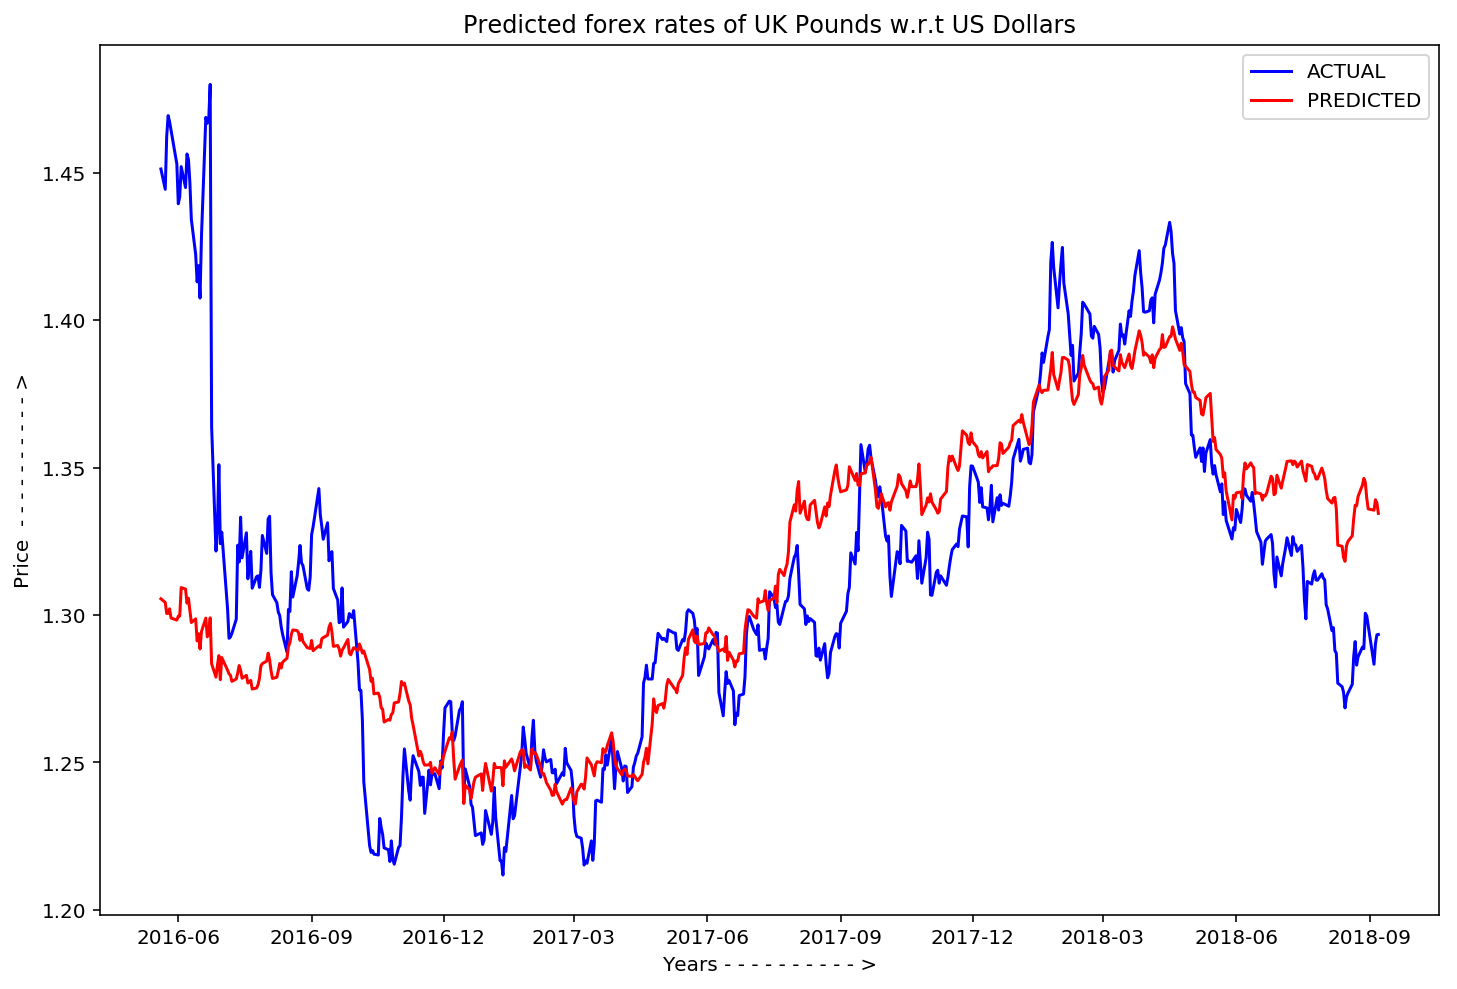

In [20]:
fig = plt.figure(figsize=(12,8))
plt.plot(fd['observation_date'], fd['DEXUSUK'], label = 'ACTUAL', color = 'blue')
plt.plot(fd['observation_date'], fd['Pred_DEXUSUK'], label = 'PREDICTED', color = 'red')
plt.title('Predicted forex rates of UK Pounds w.r.t US Dollars')
plt.xlabel('Years - - - - - - - - - - >')
plt.ylabel('Price  - - - - - - - - - - >')
plt.legend()
plt.show()

#### Analysis : We observe that UK's economy has under performed from (1.451) in 2016 to (1.293) in 2018 primarily due to the brexit on March 29, 2017.
#### From the covariance of the other independent countires such as australia, switzerland & europe, we observe that our prediction is most of the time under the actual curve. Therefore, under predicted.

### <font color = 'green'>the difference between the observed value of the dependent variable (y) and the predicted value (ŷ) is called the residual </font>

In [21]:
residuals = Y-Y_hat #Residuals from OLS: Y - X*beta
residuals = np.matrix(residuals)
residuals

matrix([[  1.45795093e-01],
        [  1.40118693e-01],
        [  1.61770360e-01],
        [  1.68867748e-01],
        [  1.65192070e-01],
        [  1.65408645e-01],
        [  1.54722257e-01],
        [  1.39860088e-01],
        [  1.42253335e-01],
        [  1.42780158e-01],
        [  1.36193735e-01],
        [  1.52353985e-01],
        [  1.48905765e-01],
        [  1.45123021e-01],
        [  1.36741591e-01],
        [  1.23578719e-01],
        [  1.21776830e-01],
        [  1.24832796e-01],
        [  1.19000208e-01],
        [  1.34097940e-01],
        [  1.69841518e-01],
        [  1.74196210e-01],
        [  1.74419194e-01],
        [  1.80940876e-01],
        [  8.04336276e-02],
        [  4.27630986e-02],
        [  4.64575276e-02],
        [  6.47544080e-02],
        [  4.61178354e-02],
        [  4.25276152e-02],
        [  2.07837288e-02],
        [  1.20441376e-02],
        [  1.30510562e-02],
        [  1.62932501e-02],
        [  2.02858293e-02],
        [  4.3416034

### <font color = 'magenta'>sigma2</font>  is the variance of the difference between the dependent variable and its predicted value.

#### sigma2 = 1 x 1

In [22]:

from numpy.linalg import inv              # variance of Y_t or residuals
sigma2 = ((1/T)*(residuals.T))*(residuals)
sigma2 = np.matrix(sigma2)
sigma2

matrix([[ 0.00156726]])

### <font color ='magenta'>sig</font> is the standard deviation of the  difference between the dependent variable and its predicted value.

#### sig = 1 x 1 

In [23]:
from numpy import sqrt
sig = sqrt(sigma2);                      # standard deviation of Y_t or residuals
sig = np.matrix(sig)
sig

matrix([[ 0.03958868]])

### <font color ='magenta'>varcov_beta_hat</font> is the difference between the variance (difference between the dependent variable and its predicted value) and the covariance matrix  beat_hat (co-relation between independent variables w.r.t dependent variable)

In [24]:
varcov_beta_hat = (sigma2)*(inv((X.reshape(1731, 1).T)*(X.reshape(1731, 1))))
varcov_beta_hat = np.matrix(varcov_beta_hat)
varcov_beta_hat

matrix([[  9.52568181e-07]])

In [25]:
X.reshape(1731, 1).shape

(1731, 1)

In [26]:
from numpy import diag
var_beta_hat = sqrt(T*diag(varcov_beta_hat))    #N x 1
var_beta_hat = np.matrix(var_beta_hat)
var_beta_hat

matrix([[ 0.02344423]])

###  <font color ='magenta'>R square</font> is calculated below and comes to <font color ='magenta'>0.0494</font>

In [27]:
from numpy import var
R_square = (1 - residuals.T*residuals)/(T*var(Y))
R_square = np.matrix(R_square)
R_square

matrix([[ 0.04949346]])

### Similarly, <font color ='magenta'>Adjusted R square</font> is calculated below and comes to <font color ='magenta'>0.0461</font>

In [28]:
from numpy import size
N = np.size(X, 1)
adj_R_square = 1-(1-R_square)*(T-1)/(T-N);
adj_R_square

matrix([[ 0.04618159]])

### <font color ='magenta'>t-test score</font> is generated into a matrix of size (3 x 1) below:

In [29]:
# Test Each Coefficient: beta_i
t_stat = (beta_hat)/(var_beta_hat)
t_stat

matrix([[ 42.05624113],
        [-10.42752144],
        [ 16.20623399]])

### Here we are setting the <font color = 'magenta'>significance level</font> of the OLS regression into a matrix of 3 x1 using the <font color = 'red'>Normal cumulative distribution function</font>

In [30]:
from scipy.stats import norm
p_val_t = 1-norm.cdf(t_stat)
p_val_t = np.matrix(p_val_t)
p_val_t

matrix([[ 0.],
        [ 1.],
        [ 0.]])

### Test of Joint Significance of Model

#### F-stat matrix of 3 x 3

In [31]:
#F_stat = beta_hat'*varcov_beta_hat*beta_hat/(residuals'*residuals)
#  size:   (1 x N)*    (N x N)*      (N x 1)/((1 x T) *   (T x 1)) = 1 x 1
#  size:   (1 x N)*    (N x N)*      (N x 1)/((1 x T) *   (T x 1)) = 1 x 1
F_stat = ((beta_hat)*(varcov_beta_hat)*(beta_hat.T))/((residuals.T)*(residuals))
F_stat 

matrix([[  1.02402604e-06,  -2.53899379e-07,   3.94605062e-07],
        [ -2.53899379e-07,   6.29523978e-08,  -9.78392894e-08],
        [  3.94605062e-07,  -9.78392894e-08,   1.52059761e-07]])

### Below we are calculating the <font color = "magenta">P value matrix</font> for the significance level matrix defined above using the <font color = 'red'>Chi-Square cumulative distribution function</font>

In [32]:
from scipy import stats
p_val_F = 1-stats.chi2.cdf(F_stat,T-N)
p_val_F = np.matrix(p_val_F)
p_val_F

matrix([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]])

# Bollinger Bands

### For this we will be setting the short and long <font color = 'red'>MOVING AVERAGE, UPPER BOUND, and LOWER BOUND</font>


### The <font color = 'magenta'>short moving average</font> is of a period of <font color = 'magenta'>5</font> working days in a week.

In [70]:
short_MA = pred_df['Pred_DEXUSUK'].rolling(window=5).mean()
pred_df['Short_Moving_Avg'] = short_MA
pred_df.tail()

,observation_date,DEXINUS,DEXCHUS,DEXMXUS,DEXBZUS,DEXUSEU,DEXUSUK,DEXUSAL,DEXSZUS,Pred_DEXUSUK,Short_Moving_Avg
595,2018-08-31,71.00,6.8300,19.2135,4.1280,1.1596,1.2964,0.7192,0.9698,1.335987,1.342203
597,2018-09-04,71.58,6.8427,19.3505,4.1560,1.1566,1.2833,0.7174,0.9753,1.335559,1.340502
598,2018-09-05,71.75,6.8270,19.4270,4.1589,1.1620,1.2903,0.7189,0.9716,1.339111,1.339054
599,2018-09-06,71.94,6.8322,19.3610,4.1462,1.1624,1.2933,0.7198,0.9682,1.337993,1.337655
600,2018-09-07,71.78,6.8419,19.2110,4.0594,1.1572,1.2934,0.7135,0.9684,1.334482,1.336626


### Similarly, The <font color = 'magenta'>long moving average</font> is of a period of <font color = 'magenta'>20</font> working days in a month.

In [73]:
long_MA = pred_df['Pred_DEXUSUK'].rolling(window=20).mean()
pred_df['Long_Moving_Avg'] = long_MA
pred_df.tail()

,observation_date,DEXINUS,DEXCHUS,DEXMXUS,DEXBZUS,DEXUSEU,DEXUSUK,DEXUSAL,DEXSZUS,Pred_DEXUSUK,Short_Moving_Avg,Long_Moving_Avg
595,2018-08-31,71.00,6.8300,19.2135,4.1280,1.1596,1.2964,0.7192,0.9698,1.335987,1.342203,1.333590
597,2018-09-04,71.58,6.8427,19.3505,4.1560,1.1566,1.2833,0.7174,0.9753,1.335559,1.340502,1.333469
598,2018-09-05,71.75,6.8270,19.4270,4.1589,1.1620,1.2903,0.7189,0.9716,1.339111,1.339054,1.333441
599,2018-09-06,71.94,6.8322,19.3610,4.1462,1.1624,1.2933,0.7198,0.9682,1.337993,1.337655,1.333345
600,2018-09-07,71.78,6.8419,19.2110,4.0594,1.1572,1.2934,0.7135,0.9684,1.334482,1.336626,1.333269


### Now, Calculating the <font color = 'magenta'>Standard Deviation</font> of the <font color = 'red'>long moving average</font> for determining the variance and account for the <font color = 'red'>volitility</font> used in the bollinger band for stock trading.

In [86]:
long_std= pred_df['Pred_DEXUSUK'].rolling(window=20).std()
pred_df['Long_volatility'] = long_std
pred_df.tail()

,observation_date,DEXINUS,DEXCHUS,DEXMXUS,DEXBZUS,DEXUSEU,DEXUSUK,DEXUSAL,DEXSZUS,Pred_DEXUSUK,Short_Moving_Avg,Long_Moving_Avg,Long_volatility
595,2018-08-31,71.00,6.8300,19.2135,4.1280,1.1596,1.2964,0.7192,0.9698,1.335987,1.342203,1.333590,0.008818
597,2018-09-04,71.58,6.8427,19.3505,4.1560,1.1566,1.2833,0.7174,0.9753,1.335559,1.340502,1.333469,0.008771
598,2018-09-05,71.75,6.8270,19.4270,4.1589,1.1620,1.2903,0.7189,0.9716,1.339111,1.339054,1.333441,0.008752
599,2018-09-06,71.94,6.8322,19.3610,4.1462,1.1624,1.2933,0.7198,0.9682,1.337993,1.337655,1.333345,0.008687
600,2018-09-07,71.78,6.8419,19.2110,4.0594,1.1572,1.2934,0.7135,0.9684,1.334482,1.336626,1.333269,0.008669


### Now, we will calculate the <font color = 'magenta'>Upper and Lower Bands</font> for Buying and selling signals in Stock Trading



### <font color = 'green'>Upper Band:</font> The upper band is simply two standard deviations above the moving average of a stock’s price. 
### <font color = 'green'>Upper Band:</font>  = 20 day moving average + (20 Day standard deviation of price x 2)

In [90]:
long_upper_band = (long_MA) + ((long_std)*2)
pred_df['Long_Upper_Band'] = long_upper_band
pred_df.tail()

,observation_date,DEXINUS,DEXCHUS,DEXMXUS,DEXBZUS,DEXUSEU,DEXUSUK,DEXUSAL,DEXSZUS,Pred_DEXUSUK,Short_Moving_Avg,Long_Moving_Avg,Long_volatility,Long_Upper_Band
595,2018-08-31,71.00,6.8300,19.2135,4.1280,1.1596,1.2964,0.7192,0.9698,1.335987,1.342203,1.333590,0.008818,1.351227
597,2018-09-04,71.58,6.8427,19.3505,4.1560,1.1566,1.2833,0.7174,0.9753,1.335559,1.340502,1.333469,0.008771,1.351012
598,2018-09-05,71.75,6.8270,19.4270,4.1589,1.1620,1.2903,0.7189,0.9716,1.339111,1.339054,1.333441,0.008752,1.350945
599,2018-09-06,71.94,6.8322,19.3610,4.1462,1.1624,1.2933,0.7198,0.9682,1.337993,1.337655,1.333345,0.008687,1.350719
600,2018-09-07,71.78,6.8419,19.2110,4.0594,1.1572,1.2934,0.7135,0.9684,1.334482,1.336626,1.333269,0.008669,1.350608


### <font color = 'red'>Lower Band:</font> Two standard deviations below the moving average is the lower band.
### <font color = 'red'>Lower Band:</font> = 20 day moving average - (20 Day standard deviation of price x 2)

In [91]:
long_lower_band = (long_MA) - ((long_std)*2)
pred_df['Long_Lower_Band'] = long_lower_band
pred_df.tail()

,observation_date,DEXINUS,DEXCHUS,DEXMXUS,DEXBZUS,DEXUSEU,DEXUSUK,DEXUSAL,DEXSZUS,Pred_DEXUSUK,Short_Moving_Avg,Long_Moving_Avg,Long_volatility,Long_Upper_Band,Long_Lower_Band
595,2018-08-31,71.00,6.8300,19.2135,4.1280,1.1596,1.2964,0.7192,0.9698,1.335987,1.342203,1.333590,0.008818,1.351227,1.315953
597,2018-09-04,71.58,6.8427,19.3505,4.1560,1.1566,1.2833,0.7174,0.9753,1.335559,1.340502,1.333469,0.008771,1.351012,1.315926
598,2018-09-05,71.75,6.8270,19.4270,4.1589,1.1620,1.2903,0.7189,0.9716,1.339111,1.339054,1.333441,0.008752,1.350945,1.315938
599,2018-09-06,71.94,6.8322,19.3610,4.1462,1.1624,1.2933,0.7198,0.9682,1.337993,1.337655,1.333345,0.008687,1.350719,1.315971
600,2018-09-07,71.78,6.8419,19.2110,4.0594,1.1572,1.2934,0.7135,0.9684,1.334482,1.336626,1.333269,0.008669,1.350608,1.315931


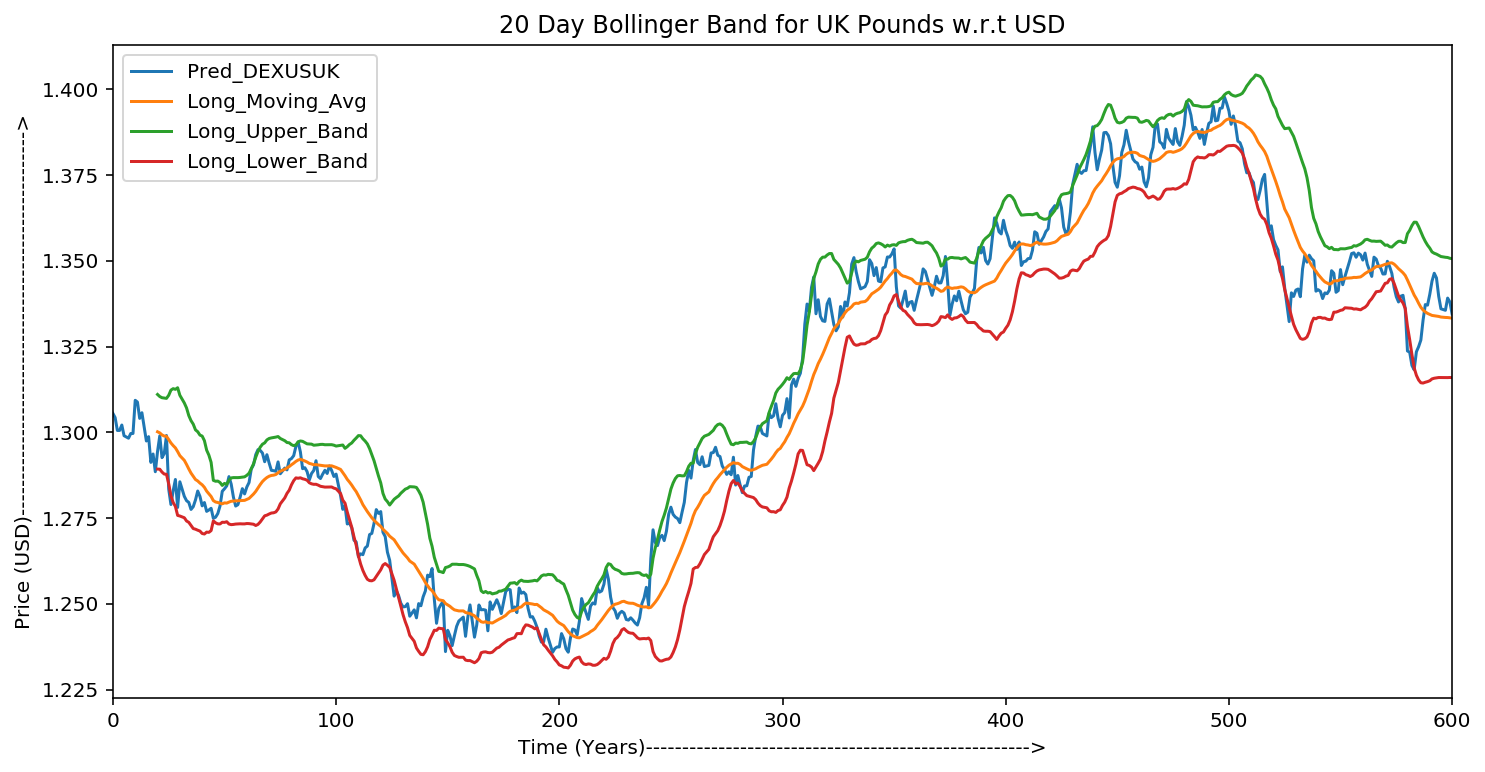

In [97]:
pred_df[['Pred_DEXUSUK', 'Long_Moving_Avg', 'Long_Upper_Band', 'Long_Lower_Band']].plot(figsize=(12,6))
plt.title('20 Day Bollinger Band for UK Pounds w.r.t USD')
plt.xlabel('Time (Years)----------------------------------------------------->')
plt.ylabel('Price (USD)----------------------------------------------------->')
plt.show()

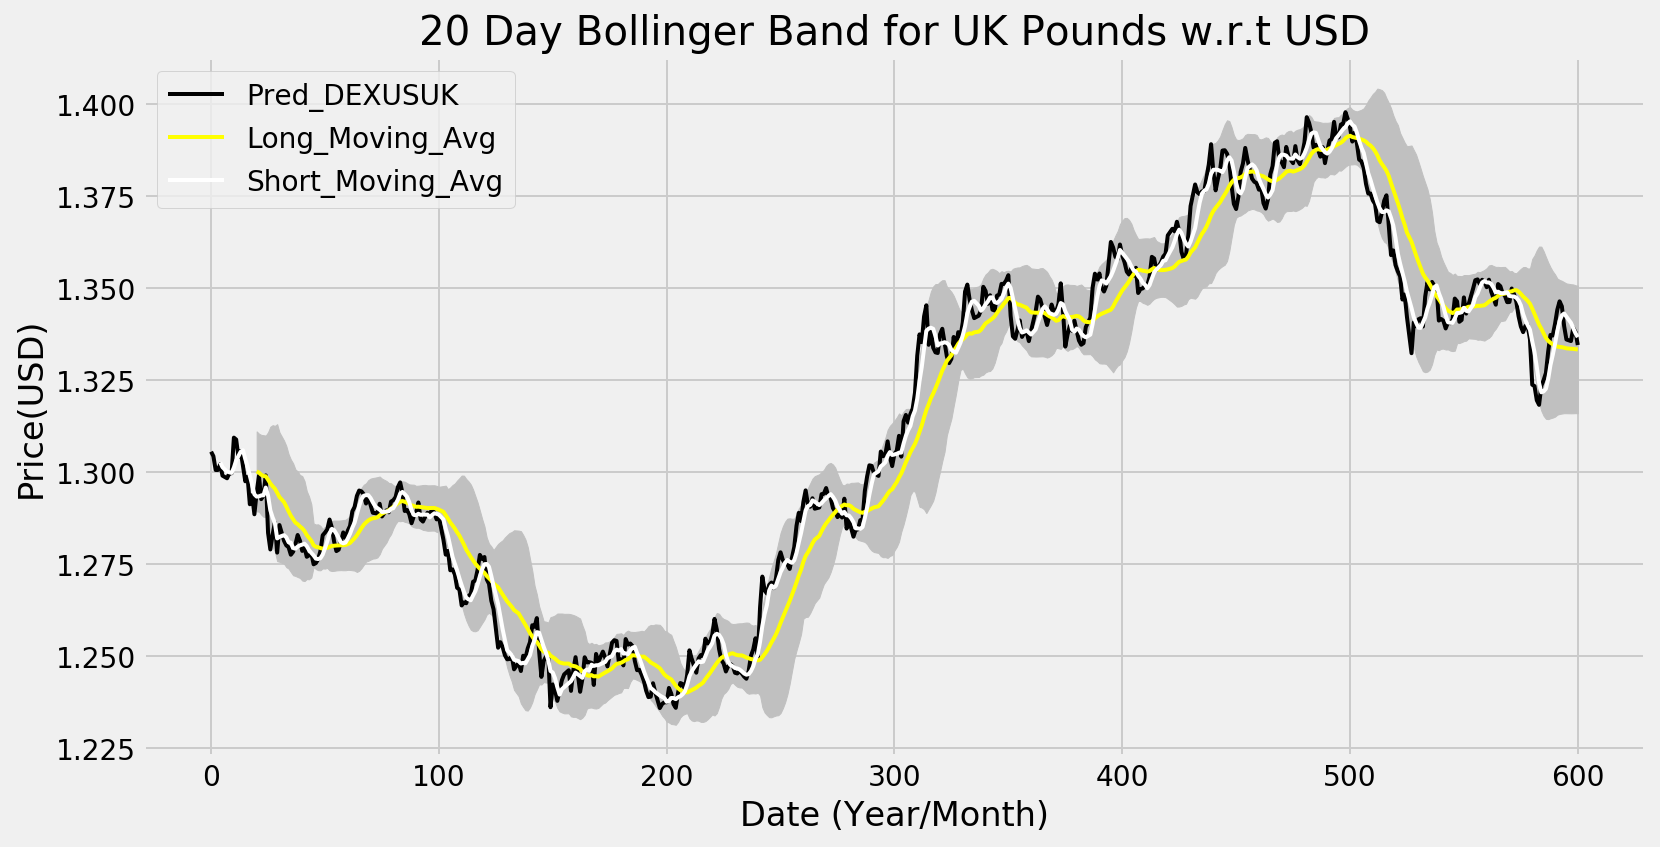

In [135]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
x_axis = pred_df.index.get_level_values(0)
ax.fill_between(x_axis, pred_df['Long_Upper_Band'], pred_df['Long_Lower_Band'], color='silver')
ax.plot(x_axis, pred_df['Pred_DEXUSUK'], color='black', lw=2)
ax.plot(x_axis, pred_df['Long_Moving_Avg'], color='yellow', lw=2)
ax.plot(x_axis, pred_df['Short_Moving_Avg'], color='white', lw=2)
ax.set_title('20 Day Bollinger Band for UK Pounds w.r.t USD')
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price(USD)')
ax.legend()
plt.show()

In [ ]:
#### Here the grey area shows the volatility of the UK pounds over 3 years from 2016 to 2018, when

In [ ]:
start_date = '2016-06-17'
end_date = '2018-09-07'
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(pred_df.loc[start_date:end_date, :].index, pred_df.loc[start_date:end_date, 'Pred_DEXUSUK'], label='Price')
ax.plot(pred_df.Long_Moving_Avg.loc(axis=0)[start_date:end_date, :].index, pred_df.Long_Moving_Avg.loc(axis=0)[start_date:end_date, 'Long_Moving_Avg'], label = 'Long_Moving_Avg')
ax.plot(pred_df.Short_Moving_Avg.loc(axis=0)[start_date:end_date, :].index, pred_df.Short_Moving_Avg.loc(axis=0)[start_date:end_date, 'Long_Moving_Avg'], label = 'Short_Moving_Avg')

ax.legend(loc='best')
ax.set_ylabel('Price in $')

## Trying 10 day moving average for better trading accuracy

In [125]:
try_2 = pred_df
med_MA = try_2['Pred_DEXUSUK'].rolling(window=10).mean()
try_2['Med_Moving_Avg'] = med_MA
try_2.tail()

,observation_date,DEXINUS,DEXCHUS,DEXMXUS,DEXBZUS,DEXUSEU,DEXUSUK,DEXUSAL,DEXSZUS,Pred_DEXUSUK,Short_Moving_Avg,Long_Moving_Avg,Long_volatility,Long_Upper_Band,Long_Lower_Band,Med_Moving_Avg
595,2018-08-31,71.00,6.8300,19.2135,4.1280,1.1596,1.2964,0.7192,0.9698,1.335987,1.342203,1.333590,0.008818,1.351227,1.315953,1.338512
597,2018-09-04,71.58,6.8427,19.3505,4.1560,1.1566,1.2833,0.7174,0.9753,1.335559,1.340502,1.333469,0.008771,1.351012,1.315926,1.339380
598,2018-09-05,71.75,6.8270,19.4270,4.1589,1.1620,1.2903,0.7189,0.9716,1.339111,1.339054,1.333441,0.008752,1.350945,1.315938,1.340018
599,2018-09-06,71.94,6.8322,19.3610,4.1462,1.1624,1.2933,0.7198,0.9682,1.337993,1.337655,1.333345,0.008687,1.350719,1.315971,1.340095
600,2018-09-07,71.78,6.8419,19.2110,4.0594,1.1572,1.2934,0.7135,0.9684,1.334482,1.336626,1.333269,0.008669,1.350608,1.315931,1.339837


In [126]:
med_std= try_2['Pred_DEXUSUK'].rolling(window=10).std()
try_2['Med_volatility'] = med_std
try_2.tail()

,observation_date,DEXINUS,DEXCHUS,DEXMXUS,DEXBZUS,DEXUSEU,DEXUSUK,DEXUSAL,DEXSZUS,Pred_DEXUSUK,Short_Moving_Avg,Long_Moving_Avg,Long_volatility,Long_Upper_Band,Long_Lower_Band,Med_Moving_Avg,Med_volatility
595,2018-08-31,71.00,6.8300,19.2135,4.1280,1.1596,1.2964,0.7192,0.9698,1.335987,1.342203,1.333590,0.008818,1.351227,1.315953,1.338512,0.005937
597,2018-09-04,71.58,6.8427,19.3505,4.1560,1.1566,1.2833,0.7174,0.9753,1.335559,1.340502,1.333469,0.008771,1.351012,1.315926,1.339380,0.004511
598,2018-09-05,71.75,6.8270,19.4270,4.1589,1.1620,1.2903,0.7189,0.9716,1.339111,1.339054,1.333441,0.008752,1.350945,1.315938,1.340018,0.003871
599,2018-09-06,71.94,6.8322,19.3610,4.1462,1.1624,1.2933,0.7198,0.9682,1.337993,1.337655,1.333345,0.008687,1.350719,1.315971,1.340095,0.003817
600,2018-09-07,71.78,6.8419,19.2110,4.0594,1.1572,1.2934,0.7135,0.9684,1.334482,1.336626,1.333269,0.008669,1.350608,1.315931,1.339837,0.004120


In [127]:
med_upper_band = (med_MA) + ((med_std)*2)
try_2['Med_Upper_Band'] = med_upper_band
try_2.tail()

,observation_date,DEXINUS,DEXCHUS,DEXMXUS,DEXBZUS,DEXUSEU,DEXUSUK,DEXUSAL,DEXSZUS,Pred_DEXUSUK,Short_Moving_Avg,Long_Moving_Avg,Long_volatility,Long_Upper_Band,Long_Lower_Band,Med_Moving_Avg,Med_volatility,Med_Upper_Band
595,2018-08-31,71.00,6.8300,19.2135,4.1280,1.1596,1.2964,0.7192,0.9698,1.335987,1.342203,1.333590,0.008818,1.351227,1.315953,1.338512,0.005937,1.350386
597,2018-09-04,71.58,6.8427,19.3505,4.1560,1.1566,1.2833,0.7174,0.9753,1.335559,1.340502,1.333469,0.008771,1.351012,1.315926,1.339380,0.004511,1.348402
598,2018-09-05,71.75,6.8270,19.4270,4.1589,1.1620,1.2903,0.7189,0.9716,1.339111,1.339054,1.333441,0.008752,1.350945,1.315938,1.340018,0.003871,1.347761
599,2018-09-06,71.94,6.8322,19.3610,4.1462,1.1624,1.2933,0.7198,0.9682,1.337993,1.337655,1.333345,0.008687,1.350719,1.315971,1.340095,0.003817,1.347729
600,2018-09-07,71.78,6.8419,19.2110,4.0594,1.1572,1.2934,0.7135,0.9684,1.334482,1.336626,1.333269,0.008669,1.350608,1.315931,1.339837,0.004120,1.348077


In [128]:
med_lower_band = (med_MA) - ((med_std)*2)
try_2['Med_Lower_Band'] = med_lower_band
try_2.tail()

,observation_date,DEXINUS,DEXCHUS,DEXMXUS,DEXBZUS,DEXUSEU,DEXUSUK,DEXUSAL,DEXSZUS,Pred_DEXUSUK,Short_Moving_Avg,Long_Moving_Avg,Long_volatility,Long_Upper_Band,Long_Lower_Band,Med_Moving_Avg,Med_volatility,Med_Upper_Band,Med_Lower_Band
595,2018-08-31,71.00,6.8300,19.2135,4.1280,1.1596,1.2964,0.7192,0.9698,1.335987,1.342203,1.333590,0.008818,1.351227,1.315953,1.338512,0.005937,1.350386,1.326637
597,2018-09-04,71.58,6.8427,19.3505,4.1560,1.1566,1.2833,0.7174,0.9753,1.335559,1.340502,1.333469,0.008771,1.351012,1.315926,1.339380,0.004511,1.348402,1.330357
598,2018-09-05,71.75,6.8270,19.4270,4.1589,1.1620,1.2903,0.7189,0.9716,1.339111,1.339054,1.333441,0.008752,1.350945,1.315938,1.340018,0.003871,1.347761,1.332275
599,2018-09-06,71.94,6.8322,19.3610,4.1462,1.1624,1.2933,0.7198,0.9682,1.337993,1.337655,1.333345,0.008687,1.350719,1.315971,1.340095,0.003817,1.347729,1.332462
600,2018-09-07,71.78,6.8419,19.2110,4.0594,1.1572,1.2934,0.7135,0.9684,1.334482,1.336626,1.333269,0.008669,1.350608,1.315931,1.339837,0.004120,1.348077,1.331597


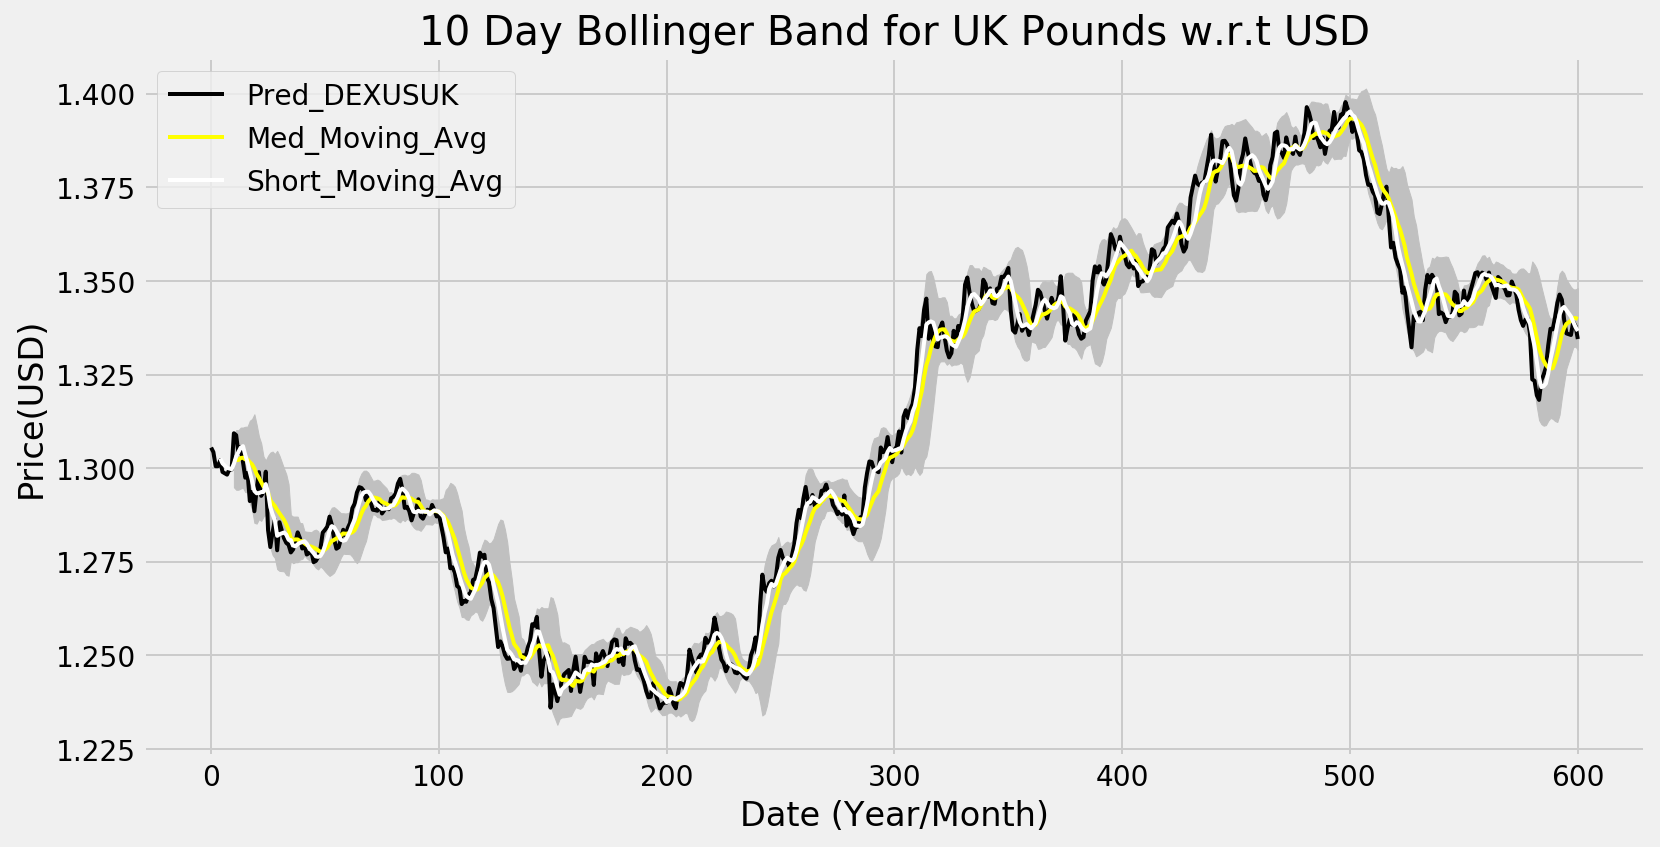

In [136]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
x_axis = try_2.index.get_level_values(0)
ax.fill_between(x_axis, try_2['Med_Upper_Band'], try_2['Med_Lower_Band'], color='silver')
ax.plot(x_axis, try_2['Pred_DEXUSUK'], color='black', lw=2)
ax.plot(x_axis, try_2['Med_Moving_Avg'], color='yellow', lw=2)
ax.plot(x_axis, try_2['Short_Moving_Avg'], color='white', lw=2)
ax.set_title('10 Day Bollinger Band for UK Pounds w.r.t USD')
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price(USD)')
ax.legend()
plt.show()